# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 7

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['value_next10']  = df['xPoints_next10'] / (df['now_cost'] / 10.0)

In [6]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [7]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 1

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [8]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
270,de Gea,Manchester Utd,51,7.0,28,33.057862,4.0,4.722552,4.972935,40.346615,2.091181
475,Sá,Wolves,50,7.0,30,31.899519,4.3,4.557074,5.073907,40.093488,2.037985
294,Darlow,Newcastle Utd,45,3.0,11,12.794823,3.7,4.264941,4.800325,38.066225,2.010513
353,Lloris,Tottenham,55,7.0,35,31.115050,5.0,4.445007,3.557039,40.434397,1.895357
80,Raya,Brentford,46,7.0,30,27.590528,4.3,3.941504,4.142381,41.775104,1.837736
146,Guaita,Crystal Palace,45,7.0,26,26.802728,3.7,3.828961,3.851870,38.877936,1.804990
257,Ederson,Manchester City,60,7.0,35,30.812107,5.0,4.401730,4.706547,39.199677,1.796999
376,Foster,Watford,40,3.0,8,10.565233,2.7,3.521744,3.487018,38.926204,1.760872
30,Martínez,Aston Villa,55,6.0,30,24.634873,5.0,4.105812,4.821181,36.588535,1.750724


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
135,Chilwell,Chelsea,56,1.0,8,7.370842,8.0,7.370842,7.186388,62.754489,3.114749
253,Mendy,Manchester City,53,1.0,3,6.158872,3.0,6.158872,NaN,36.554402,2.675243
237,Alexander-Arnold,Liverpool,75,5.0,35,35.029663,7.0,7.005933,6.552239,50.984297,2.558205
256,Cancelo,Manchester City,62,7.0,44,42.854107,6.3,6.122015,6.514947,44.827553,2.458661
259,Laporte,Manchester City,55,5.0,31,26.594362,6.2,5.318872,4.837864,36.100491,2.267975
527,Chalobah,Chelsea,48,4.0,32,19.683367,8.0,4.920842,4.292969,39.545710,2.246047
258,Aké,Manchester City,49,2.0,8,9.717745,4.0,4.858872,4.681280,30.608296,2.195015
91,Pinnock,Brentford,46,7.0,38,32.161528,5.4,4.594504,4.829806,38.615974,2.142199
245,Tsimikas,Liverpool,40,4.0,23,17.101130,5.8,4.275283,2.713139,31.554214,2.137641


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
268,Torres,Manchester City,69,4.0,26,25.029872,6.5,6.257468,8.562583,40.820431,2.382177
233,Salah,Liverpool,127,7.0,70,58.504682,10.0,8.357812,8.690574,61.296235,2.345259
482,Townsend,Everton,56,7.0,43,36.429124,6.1,5.204161,6.088410,43.045551,2.199159
96,Mbeumo,Brentford,55,7.0,27,34.997632,3.9,4.999662,5.355595,41.609780,2.131863
419,Benrahma,West Ham,66,7.0,44,37.574346,6.3,5.367764,4.456988,45.658441,2.089399
173,Doucouré,Everton,57,7.0,43,33.651124,6.1,4.807303,5.336810,42.209575,2.013558
186,Klich,Leeds United,55,5.0,21,23.209386,4.2,4.641877,4.932533,41.680784,1.979303
144,Gallagher,Crystal Palace,57,6.0,34,27.599299,5.7,4.599883,4.855567,39.551009,1.926679
240,Jota,Liverpool,76,7.0,32,36.900682,4.6,5.271526,5.412308,48.146505,1.912183


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
177,Calvert-Lewin,Everton,80,3.0,23,25.540,7.7,8.513333,8.200000,52.705400,3.009918
413,Antonio,West Ham,80,6.0,49,41.104,8.2,6.850667,5.192750,70.894950,2.422076
583,Hwang,Wolves,56,4.0,24,18.800,6.0,4.700000,3.866667,37.791968,1.986112
307,Saint-Maximin,Newcastle Utd,68,7.0,37,35.713,5.3,5.101857,5.748400,44.662884,1.956473
78,Toney,Brentford,64,7.0,31,33.962,4.4,4.851714,5.628400,47.087679,1.917808
189,Bamford,Leeds United,78,5.0,21,26.342,4.2,5.268400,5.957000,44.349471,1.886390
296,Wilson,Newcastle Utd,73,3.0,16,15.200,5.3,5.066667,7.800000,43.222291,1.875257
205,Vardy,Leicester City,105,7.0,48,41.271,6.9,5.895857,7.114200,50.385484,1.819501
263,Jesus,Manchester City,86,7.0,41,36.884,5.9,5.269143,5.368400,40.331500,1.796763


Below we compile a list sorting players based on a given metric (irrespective of position).

In [9]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,xPoints_next10,valuePoints metric
id,,,,,,,,,,
177,Calvert-Lewin,Everton,80,3.0,23,25.540000,7.7,8.513333,52.705400,3.009918
233,Salah,Liverpool,127,7.0,70,58.504682,10.0,8.357812,61.296235,2.345259
135,Chilwell,Chelsea,56,1.0,8,7.370842,8.0,7.370842,62.754489,3.114749
237,Alexander-Arnold,Liverpool,75,5.0,35,35.029663,7.0,7.005933,50.984297,2.558205
413,Antonio,West Ham,80,6.0,49,41.104000,8.2,6.850667,70.894950,2.422076
230,Mané,Liverpool,119,7.0,41,44.971682,5.9,6.424526,49.441953,1.862377
268,Torres,Manchester City,69,4.0,26,25.029872,6.5,6.257468,40.820431,2.382177
253,Mendy,Manchester City,53,1.0,3,6.158872,3.0,6.158872,36.554402,2.675243
256,Cancelo,Manchester City,62,7.0,44,42.854107,6.3,6.122015,44.827553,2.458661


In [10]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,
135,Chilwell,Chelsea,56,1.0,8.0,7.370842,7.186388,62.754489,3.114749
177,Calvert-Lewin,Everton,80,3.0,7.7,8.513333,8.200000,52.705400,3.009918
253,Mendy,Manchester City,53,1.0,3.0,6.158872,NaN,36.554402,2.675243
237,Alexander-Arnold,Liverpool,75,5.0,7.0,7.005933,6.552239,50.984297,2.558205
256,Cancelo,Manchester City,62,7.0,6.3,6.122015,6.514947,44.827553,2.458661
413,Antonio,West Ham,80,6.0,8.2,6.850667,5.192750,70.894950,2.422076
268,Torres,Manchester City,69,4.0,6.5,6.257468,8.562583,40.820431,2.382177
233,Salah,Liverpool,127,7.0,10.0,8.357812,8.690574,61.296235,2.345259
259,Laporte,Manchester City,55,5.0,6.2,5.318872,4.837864,36.100491,2.267975


In [11]:
metric = 'form 10'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 10',\
                                                        'xPoints_next10','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 10,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
177,Calvert-Lewin,Everton,80,3.0,23,25.540000,7.7,8.513333,8.833333,52.705400,3.009918
233,Salah,Liverpool,127,7.0,70,58.504682,10.0,8.357812,8.448293,61.296235,2.345259
135,Chilwell,Chelsea,56,1.0,8,7.370842,8.0,7.370842,7.186388,62.754489,3.114749
237,Alexander-Arnold,Liverpool,75,5.0,35,35.029663,7.0,7.005933,7.040089,50.984297,2.558205
413,Antonio,West Ham,80,6.0,49,41.104000,8.2,6.850667,6.850667,70.894950,2.422076
230,Mané,Liverpool,119,7.0,41,44.971682,5.9,6.424526,6.446436,49.441953,1.862377
256,Cancelo,Manchester City,62,7.0,44,42.854107,6.3,6.122015,6.326316,44.827553,2.458661
268,Torres,Manchester City,69,4.0,26,25.029872,6.5,6.257468,6.325634,40.820431,2.382177
205,Vardy,Leicester City,105,7.0,48,41.271000,6.9,5.895857,5.895857,50.385484,1.819501


In [12]:
metric = f'gameweek {gameweek+1} prediction'
#metric = f'xPoints_next10'

display(df[forwards].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,gameweek 8 prediction,valuePoints metric
id,,,,,,,,,,
413,Antonio,West Ham,80,6.0,49,41.104,8.2,6.850667,6.697718,2.422076
529,Lukaku,Chelsea,117,6.0,29,35.100,4.8,5.850000,5.626909,1.710263
177,Calvert-Lewin,Everton,80,3.0,23,25.540,7.7,8.513333,5.361868,3.009918
579,Ronaldo,Manchester Utd,126,4.0,22,21.800,5.5,5.450000,5.158253,1.535364
63,Maupay,Brighton,65,7.0,32,26.820,4.6,3.831429,5.129704,1.502810
189,Bamford,Leeds United,78,5.0,21,26.342,4.2,5.268400,4.967443,1.886390
307,Saint-Maximin,Newcastle Utd,68,7.0,37,35.713,5.3,5.101857,4.601574,1.956473
263,Jesus,Manchester City,86,7.0,41,36.884,5.9,5.269143,4.591570,1.796763
296,Wilson,Newcastle Utd,73,3.0,16,15.200,5.3,5.066667,4.200985,1.875257


In [13]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,
230,Mané,Liverpool,119,7.0,5.9,6.424526,1.862377,5.0,1.0,6.0,0.857143
205,Vardy,Leicester City,105,7.0,6.9,5.895857,1.819501,4.5,0.5,5.0,0.714286
233,Salah,Liverpool,127,7.0,10.0,8.357812,2.345259,4.2,2.9,7.1,1.014286
413,Antonio,West Ham,80,6.0,8.2,6.850667,2.422076,3.8,2.1,5.9,0.983333
177,Calvert-Lewin,Everton,80,3.0,7.7,8.513333,3.009918,3.8,0.1,3.9,1.300000
240,Jota,Liverpool,76,7.0,4.6,5.271526,1.912183,3.4,1.9,5.3,0.757143
96,Mbeumo,Brentford,55,7.0,3.9,4.999662,2.131863,3.3,0.7,4.0,0.571429
529,Lukaku,Chelsea,117,6.0,4.8,5.850000,1.710263,3.1,1.9,5.0,0.833333
189,Bamford,Leeds United,78,5.0,4.2,5.268400,1.886390,3.0,0.6,3.6,0.720000


## Player Visualizations

In [14]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,adjusted points,adjusted points per game,assists,assists_week1,assists_week2,assists_week3,assists_week4,assists_week5,assists_week6,assists_week7,bonus,bonus_week1,bonus_week2,bonus_week3,bonus_week4,bonus_week5,bonus_week6,bonus_week7,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week2,cleansheet_week3,cleansheet_week4,cleansheet_week5,cleansheet_week6,cleansheet_week7,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,form 10,...,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value,value form 10,value form 5,valuePoints metric,value_form,value_next10,value_season,web_name,xA,xA_points,xA_week1,xA_week2,xA_week3,xA_week4,xA_week5,xA_week6,xA_week7,xG,xG+xA,xG+xA per game,xGA_week1,xGA_week2,xGA_week3,xGA_week4,xGA_week5,xGA_week6,xGA_week7,xG_points,xG_week1,xG_week2,xG_week3,xG_week4,xG_week5,xG_week6,xG_week7,xPoints,xPoints week 1,xPoints week 2,xPoints week 3,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints_next10,yellow_cards,gameweek 17 prediction
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
430,29.342,4.191714,2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4,0.0,0.0,0.0,0.0,0.0,2.0,2.0,72,NaN,NaN,0.0,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,102057,NaN,NaN,0,0,0,0,235.2,6,1,NaN,NaN,1,4,6.7,7.2,10,Raúl,6.7,4.191714,...,671554,103363,438208,29795,0.558895,0.558895,0.643787,1.530598,0.9,5.000229,3.5,Jiménez,1.4,4.2,0.1,0.1,0.2,0.3,0.2,0.1,0.4,1.9,3.3,0.471429,0.8,1.5,0.6,0.2,2.5,1.2,0.6,7.6,0.1,0.3,0.3,0.1,0.2,0.8,0.1,7.142,2.7,2.5,3.8,2.3,3.4,7.5,7.142,37.501718,2,3.75223


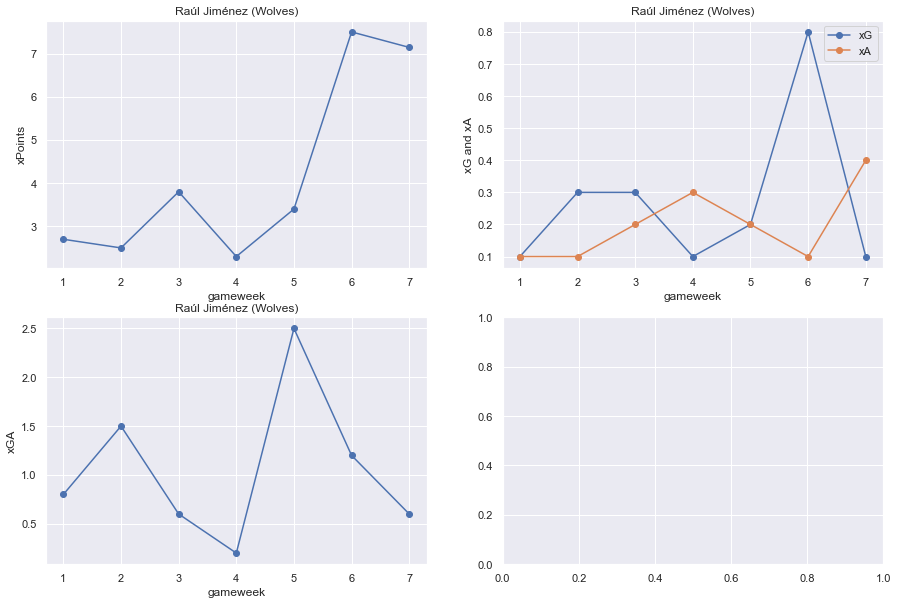

In [15]:
# find player index
name_string = 'Jim'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
ix = playersFound.index[0]
#ix = 468

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [16]:
session = requests.session()

In [17]:
filepath = Path('../../../access_control/FPL_access.txt')
with open(filepath) as file:
    text = file.read().splitlines()
    email = text[0]
    password = text[1]

In [18]:
url = 'https://users.premierleague.com/accounts/login/'

payload = {
'password': password,
'login': email,
'redirect_uri': 'https://fantasy.premierleague.com/a/login', 'app': 'plfpl-web'
}
session.post(url, data=payload)

<Response [200]>

In [19]:
response = session.get('https://fantasy.premierleague.com/api/my-team/3202682')
team = response.json()['picks']

In [20]:
my_player_ix = [player['element'] for player in team]
my_starting11 = my_player_ix[:-4]
my_subs = my_player_ix[-4:]

In [21]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + \
                df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11, f'gameweek {gameweek+1} prediction'].sum() + \
                df.loc[my_starting11,f'gameweek {gameweek+1} prediction'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Predicted points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
           f'gameweek {gameweek+1} prediction','xPoints_next10', 'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
         f'gameweek {gameweek+1} prediction', 'xPoints_next10', 'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 68.56533455374867
Predicted points next gameweek: 61.267266273498535


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 8 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
559,Ramsdale,Arsenal,46,4.0,6.0,3.680359,4.377248,4.377248,3.818795,37.897926,1.715976
256,Cancelo,Manchester City,62,7.0,6.3,6.122015,6.514947,6.326316,4.948884,44.827553,2.458661
237,Alexander-Arnold,Liverpool,75,5.0,7.0,7.005933,6.552239,7.040089,6.022261,50.984297,2.558205
127,Rüdiger,Chelsea,58,7.0,5.1,3.556556,3.512961,3.927336,3.513627,37.862314,1.476780
196,Raphinha,Leeds United,66,7.0,4.4,4.624820,5.318302,4.719585,4.550933,40.371165,1.800209
233,Salah,Liverpool,127,7.0,10.0,8.357812,8.690574,8.448293,7.000152,61.296235,2.345259
144,Gallagher,Crystal Palace,57,6.0,5.7,4.599883,4.855567,4.704528,4.292428,39.551009,1.926679
419,Benrahma,West Ham,66,7.0,6.3,5.367764,4.456988,5.388981,4.024187,45.658441,2.089399
413,Antonio,West Ham,80,6.0,8.2,6.850667,5.192750,6.850667,6.697718,70.894950,2.422076



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 8 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
376,Foster,Watford,40,3.0,2.7,3.521744,3.487018,3.487018,3.686935,38.926204,1.760872
491,Livramento,Southampton,42,7.0,3.0,2.815732,3.521858,3.123526,2.749315,32.429425,1.373937
302,Manquillo,Newcastle Utd,40,4.0,3.2,2.391024,2.753797,2.753797,3.042738,29.590811,1.195512
115,Brownhill,Burnley,44,7.0,1.6,2.013319,2.175532,2.075520,2.049298,24.739703,0.959812


## Save data

In [22]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)